In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import  seaborn   as sns
from sklearn import metrics
from sklearn.metrics import f1_score , make_scorer

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import make_pipeline
#from pylab import rcParams
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [89]:
####  read the data

df = pd.read_csv('Desktop/sec_students/complete2017.csv')

In [90]:
df.head()

,student_no,school,gender,governorate,track,sub_track,term,gpa,year,st_code
0,120172,1,1,3,0,0,1,92.7,2017,2
1,120172,1,1,3,0,0,2,90.7,2017,2
2,120172,1,1,3,1,1,3,89.2,2017,2
3,120172,1,1,3,1,1,4,91.8,2017,2
4,120172,1,1,3,1,1,5,92.3,2017,2


In [91]:
df.isnull().sum()

student_no     0
school         0
gender         0
governorate    0
track          0
sub_track      0
term           0
gpa            0
year           0
st_code        0
dtype: int64

In [92]:
df=  df.drop("year", axis=1)
df=  df.drop("st_code", axis=1)

In [93]:
df.head()

,student_no,school,gender,governorate,track,sub_track,term,gpa
0,120172,1,1,3,0,0,1,92.7
1,120172,1,1,3,0,0,2,90.7
2,120172,1,1,3,1,1,3,89.2
3,120172,1,1,3,1,1,4,91.8
4,120172,1,1,3,1,1,5,92.3


In [19]:
df.keys()

Index(['school', 'st_code', ' gpa', 'gender', 'governorate'], dtype='object')

In [137]:
df_encoded=df.pivot_table(index =['student_no', "school", "gender", "governorate"],
                         columns =['term'], values =['gpa']) 

In [138]:
df_encoded.head()

gpa                        
term                                     1     2     3     4     5
student_no school gender governorate                              
120172     1      1      3            92.7  90.7  89.2  91.8  92.3
120173     1      1      3            78.1  82.4  88.2  89.4  92.0
120174     1      1      3            83.8  87.0  89.1  86.8  89.2
120175     1      1      3            84.7  85.7  83.1  88.7  83.3
120177     1      1      3            71.6  80.0  83.1  86.1  88.3

In [139]:
df_encoded = df_encoded.reset_index(level=[1,2,3])

In [140]:
df_encoded.head()

school gender governorate   gpa                        
term                                     1     2     3     4     5
student_no                                                        
120172          1      1           3  92.7  90.7  89.2  91.8  92.3
120173          1      1           3  78.1  82.4  88.2  89.4  92.0
120174          1      1           3  83.8  87.0  89.1  86.8  89.2
120175          1      1           3  84.7  85.7  83.1  88.7  83.3
120177          1      1           3  71.6  80.0  83.1  86.1  88.3

In [141]:
df_encoded.columns = df_encoded.columns.get_level_values(0)


In [142]:
df_encoded.head()

,school,gender,governorate,gpa,gpa,gpa,gpa,gpa
student_no,,,,,,,,
120172,1,1,3,92.7,90.7,89.2,91.8,92.3
120173,1,1,3,78.1,82.4,88.2,89.4,92.0
120174,1,1,3,83.8,87.0,89.1,86.8,89.2
120175,1,1,3,84.7,85.7,83.1,88.7,83.3
120177,1,1,3,71.6,80.0,83.1,86.1,88.3


In [150]:
df_encoded.columns.values[3] = "gpa1"
df_encoded.columns.values[4] = "gpa2"
df_encoded.columns.values[5] = "gpa3"
df_encoded.columns.values[6] = "gpa4"
df_encoded.columns.values[7] = "gpa5"


In [152]:
df_encoded.head()

,school,gender,governorate,gpa1,gpa2,gpa3,gpa4,gpa5
student_no,,,,,,,,
120172,1,1,3,92.7,90.7,89.2,91.8,92.3
120173,1,1,3,78.1,82.4,88.2,89.4,92.0
120174,1,1,3,83.8,87.0,89.1,86.8,89.2
120175,1,1,3,84.7,85.7,83.1,88.7,83.3
120177,1,1,3,71.6,80.0,83.1,86.1,88.3


In [153]:
###### STANDARD SCALER 


sc=StandardScaler()

df_encoded[['gpa1', 'gpa2','gpa3','gpa4','gpa5']] = sc.fit_transform(df_encoded[['gpa1', 'gpa2','gpa3','gpa4','gpa5']])

In [154]:
########  Label encoding for tetarget GPA1

#bins = [0, 60, 70, 80, 90, 95,100]
#labels = [ 'F', 'D', 'C', 'B', 'A','A+']

In [151]:
#df_encoded['GPA1'] = pd.cut(df_encoded['GPA1'], bins=bins, labels=labels , right = False)

In [155]:
#df.head()

In [156]:
#df.GPA1.unique()

In [157]:
#df["school"] -=1

In [157]:
#######   ONE HOT ENCODING 

from sklearn.preprocessing import OneHotEncoder


enc=pd.get_dummies(df_encoded["governorate"], prefix='gov')
db=pd.concat([df_encoded.drop("governorate" , axis=1), enc],  axis=1)


enc=pd.get_dummies(db["school"], prefix="sch")
db=pd.concat([db.drop("school" , axis=1), enc],  axis=1)

In [158]:
db.keys()

Index(['gender', 'gpa1', 'gpa2', 'gpa3', 'gpa4', 'gpa5', 'gov_0', 'gov_1',
       'gov_2', 'gov_3', 'sch_1', 'sch_2', 'sch_3', 'sch_5', 'sch_6', 'sch_7',
       'sch_8', 'sch_9', 'sch_13', 'sch_14', 'sch_15', 'sch_16', 'sch_17',
       'sch_18', 'sch_20', 'sch_21', 'sch_22', 'sch_23', 'sch_24', 'sch_25',
       'sch_26', 'sch_27', 'sch_28', 'sch_29', 'sch_31', 'sch_32'],
      dtype='object')

In [159]:
db.head()

,gender,gpa1,gpa2,gpa3,gpa4,gpa5,gov_0,gov_1,gov_2,gov_3,...,sch_22,sch_23,sch_24,sch_25,sch_26,sch_27,sch_28,sch_29,sch_31,sch_32
student_no,,,,,,,,,,,,,,,,,,,,,
120172,1,1.132585,0.981089,0.652316,0.866627,0.852339,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120173,1,-0.213424,0.211154,0.547748,0.620259,0.817677,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120174,1,0.312072,0.637865,0.641859,0.353361,0.494168,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120175,1,0.395046,0.517273,0.014452,0.548402,-0.187512,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120177,1,-0.812675,-0.011478,0.014452,0.281504,0.390183,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [160]:
db.shape

(4117, 36)

In [163]:
######   converting type of GPA1 to classes from 0 to f



#df_encoded['GPA1'] = df_encoded['GPA1'].astype('category')


# Assigning numerical values and storing in another column
#df_encoded['GPA1'] = df_encoded['GPA1'].cat.codes

In [161]:
#df_encoded.head()

In [167]:
#df_encoded.GPA1.unique()

array([3, 4, 5, 2, 1], dtype=int64)

In [162]:
#### write the new data as CSV

db.to_csv("encodedData2017-9MARS.csv", index=True)

In [164]:
######## START FROM HERE      -------    LOADING THE ENCODED DATA


data = pd.read_csv('encodedData2017-9MARS.csv')

In [165]:
data.head()

,student_no,gender,gpa1,gpa2,gpa3,gpa4,gpa5,gov_0,gov_1,gov_2,...,sch_22,sch_23,sch_24,sch_25,sch_26,sch_27,sch_28,sch_29,sch_31,sch_32
0,120172,1,1.132585,0.981089,0.652316,0.866627,0.852339,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120173,1,-0.213424,0.211154,0.547748,0.620259,0.817677,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,120174,1,0.312072,0.637865,0.641859,0.353361,0.494168,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120175,1,0.395046,0.517273,0.014452,0.548402,-0.187512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120177,1,-0.812675,-0.011478,0.014452,0.281504,0.390183,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
data.set_index('student_no' ,inplace= True)

In [176]:
data.head()

,gender,gpa1,gpa2,gpa3,gpa4,gpa5,gov_0,gov_1,gov_2,gov_3,...,sch_22,sch_23,sch_24,sch_25,sch_26,sch_27,sch_28,sch_29,sch_31,sch_32
student_no,,,,,,,,,,,,,,,,,,,,,
120172,1,1.132585,0.981089,0.652316,0.866627,0.852339,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120173,1,-0.213424,0.211154,0.547748,0.620259,0.817677,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120174,1,0.312072,0.637865,0.641859,0.353361,0.494168,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120175,1,0.395046,0.517273,0.014452,0.548402,-0.187512,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120177,1,-0.812675,-0.011478,0.014452,0.281504,0.390183,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [171]:
import joblib

In [172]:
loaded_model = joblib.load('finalized_model.sav')

In [1]:
prediction =  loaded_model.predict(data.iloc[:10,:])

In [177]:
data.iloc[:10,:]

,gender,gpa1,gpa2,gpa3,gpa4,gpa5,gov_0,gov_1,gov_2,gov_3,...,sch_22,sch_23,sch_24,sch_25,sch_26,sch_27,sch_28,sch_29,sch_31,sch_32
student_no,,,,,,,,,,,,,,,,,,,,,
120172,1,1.132585,0.981089,0.652316,0.866627,0.852339,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120173,1,-0.213424,0.211154,0.547748,0.620259,0.817677,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120174,1,0.312072,0.637865,0.641859,0.353361,0.494168,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120175,1,0.395046,0.517273,0.014452,0.548402,-0.187512,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120177,1,-0.812675,-0.011478,0.014452,0.281504,0.390183,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120178,1,-0.388590,-0.057859,-0.612955,-0.272822,-1.250470,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
220171,0,1.363065,1.203720,1.060130,1.010341,0.725246,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
220172,0,0.856007,0.999641,0.505921,0.938484,0.216875,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
220173,0,0.911323,0.953260,0.882365,1.102729,0.609707,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [228]:
weight=data["GPA1"].value_counts().apply(lambda x : 1/(x/y.shape[0]))

data["weight"]=data["GPA1"].apply(lambda x : weight[x] )

In [230]:
weight

3      2.472851
4      3.368259
5      5.605128
2      8.850202
1    136.625000
Name: GPA1, dtype: float64

In [231]:
data.head()

,STUDENT_NO,GPA1,gender,gpa1,gpa2,gpa3,gpa4,gpa5,gov_0,gov_1,...,sch_19,sch_20,sch_21,sch_22,sch_23,sch_24,sch_25,sch_26,sch_27,weight
0,17152016100,3,1,0.166818,-0.232613,-0.214534,0.094744,-0.337099,0,0,...,0,0,0,0,0,0,0,0,0,2.472851
1,1715201611,3,1,0.585074,0.582445,0.624367,0.206273,-0.769629,0,0,...,0,0,0,0,0,0,0,0,0,2.472851
2,17152016110,3,1,-0.739404,-0.010325,-1.040328,-0.030727,-0.376420,0,0,...,0,0,0,0,0,0,0,0,0,2.472851
3,17152016116,4,1,-0.195671,0.404614,-0.148995,0.387509,0.475532,0,0,...,0,0,0,0,0,0,0,0,0,3.368259
4,17152016119,4,1,0.585074,0.952926,0.532612,0.903332,0.632815,0,0,...,0,0,0,0,0,0,0,0,0,3.368259


In [ ]:
loaded_model = joblib.load(filename)


In [232]:
####   Defining   X   and  y

X, y = data.drop("GPA1", axis=1), data["GPA1"]

In [233]:
X=X.set_index('STUDENT_NO')

In [234]:
X

,gender,gpa1,gpa2,gpa3,gpa4,gpa5,gov_0,gov_1,gov_2,gov_3,...,sch_19,sch_20,sch_21,sch_22,sch_23,sch_24,sch_25,sch_26,sch_27,weight
STUDENT_NO,,,,,,,,,,,,,,,,,,,,,
17152016100,1,0.166818,-0.232613,-0.214534,0.094744,-0.337099,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.472851
1715201611,1,0.585074,0.582445,0.624367,0.206273,-0.769629,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.472851
17152016110,1,-0.739404,-0.010325,-1.040328,-0.030727,-0.376420,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.472851
17152016116,1,-0.195671,0.404614,-0.148995,0.387509,0.475532,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.368259
17152016119,1,0.585074,0.952926,0.532612,0.903332,0.632815,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.368259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839201666,0,-0.572102,0.389795,0.571936,0.638450,0.239607,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.368259
2839201677,0,-2.635499,-1.329238,-2.718132,-1.829138,-1.503618,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8.850202
2839201685,0,-0.070194,0.167506,-0.922358,-0.741727,-0.245351,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.472851


In [235]:
y

0       3
1       3
2       3
3       4
4       4
       ..
2181    4
2182    2
2183    3
2184    4
2185    5
Name: GPA1, Length: 2186, dtype: int64

In [236]:
X.shape , y.shape

((2186, 39), (2186,))

In [237]:
##### Data splitting


X_train,X_test,y_train, y_test=train_test_split(X,y , test_size=0.3,random_state=42,stratify = y)
X_valid,X_test,y_valid, y_test=train_test_split(X_test,y_test , test_size=0.5,random_state=123)

In [238]:
X_train.shape, X_test.shape, X_valid.shape

((1530, 39), (328, 39), (328, 39))

In [239]:
from  xgboost import XGBClassifier
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [240]:
##### Random search

In [241]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': np.arange(5,10),
        'colsample_bytree': [0.5, 0.7, 0.8 ,  1.0],
        'max_depth': np.arange(3,8),
        #'max_depth': [5,10],
        #'reg_alpha' :[0 , 0.5 , 1],
        'reg_lambda' : np.arange(1,4, 0.5),
        'n_estimators' :[200 , 300 , 500 , 700 , 900 , 1000],
        'learning_rate' : np.arange(0.01, 0.52, 0.05), 
        }

In [242]:
xgb = XGBClassifier(objective='multi:softmax')

In [243]:
folds=3
#param_comb=25

skf = StratifiedKFold(n_splits=folds ,shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, scoring='f1_macro', n_jobs=-1, 
                                   cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   46.3s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000156BE6E5BC8>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:s...
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.8,
                                                             1.0],
                                        'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0

In [244]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (3, 5))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([ 8.25362913,  2.47904658,  9.14880729,  2.15306783, 11.67864569,
       11.40118647,  2.66331808,  3.43600456,  2.81129026,  5.28702307]), 'std_fit_time': array([0.00543936, 0.09700937, 0.01805309, 0.04263669, 0.09361682,
       0.21019442, 0.03957576, 0.03892656, 0.00951679, 0.19199822]), 'mean_score_time': array([0.05938292, 0.02129841, 0.05477699, 0.01875758, 0.06071552,
       0.06560914, 0.01562635, 0.01562794, 0.03125397, 0.0250903 ]), 'std_score_time': array([1.24808458e-03, 7.06158802e-03, 7.63316554e-03, 4.42744216e-03,
       4.72269527e-04, 1.34915179e-02, 2.97360213e-07, 1.76637258e-06,
       1.51207428e-06, 4.65134429e-03]), 'param_reg_lambda': masked_array(data=[2.5, 1.5, 1.5, 1.0, 2.0, 2.5, 3.5, 3.5, 1.0, 2.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[700, 200, 700, 200, 100

In [246]:
xgb = XGBClassifier( objective='multi:softmax',
                    reg_lambda= 1.5, n_estimators= 200, min_child_weight= 5, max_depth= 3,
                    learning_rate= 0.21000000000000002, colsample_bytree= 0.7 )

In [247]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.21000000000000002, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [248]:

xgb.fit(X_train,y_train, eval_set = [(X_train , y_train),(X_valid , y_valid)] ,
         sample_weight=X_train["weight"], early_stopping_rounds=15)             

[0]	validation_0-merror:0.079085	validation_1-merror:0.121951
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 15 rounds.
[1]	validation_0-merror:0.015033	validation_1-merror:0.042683
[2]	validation_0-merror:0.013725	validation_1-merror:0.042683
[3]	validation_0-merror:0.004575	validation_1-merror:0.027439


c:\users\841201935\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\841201935\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[4]	validation_0-merror:0.002614	validation_1-merror:0.018293
[5]	validation_0-merror:0.001961	validation_1-merror:0.021341
[6]	validation_0-merror:0.001307	validation_1-merror:0.018293
[7]	validation_0-merror:0.001307	validation_1-merror:0.012195
[8]	validation_0-merror:0.001307	validation_1-merror:0.012195
[9]	validation_0-merror:0	validation_1-merror:0.012195
[10]	validation_0-merror:0	validation_1-merror:0.012195
[11]	validation_0-merror:0	validation_1-merror:0.006098
[12]	validation_0-merror:0	validation_1-merror:0.006098
[13]	validation_0-merror:0	validation_1-merror:0.006098
[14]	validation_0-merror:0	validation_1-merror:0.006098
[15]	validation_0-merror:0	validation_1-merror:0.006098
[16]	validation_0-merror:0	validation_1-merror:0.006098
[17]	validation_0-merror:0	validation_1-merror:0.003049
[18]	validation_0-merror:0	validation_1-merror:0.003049
[19]	validation_0-merror:0	validation_1-merror:0.003049
[20]	validation_0-merror:0	validation_1-merror:0.003049
[21]	validation_0-m

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.21000000000000002, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [249]:
eval_result = xgb.evals_result()

In [250]:
training_rounds = range(len(eval_result['validation_0']['merror']))

In [251]:
%matplotlib inline
import matplotlib.pyplot as plt

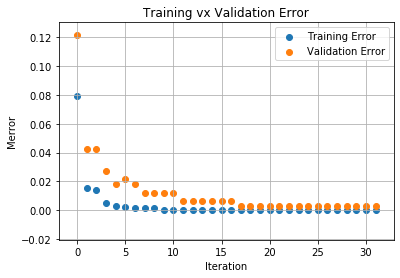

In [252]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['merror'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['merror'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Merror')
plt.title('Training vx Validation Error')
plt.legend()

In [253]:
result = xgb.predict(X_test)

In [254]:
result[0:5]

array([3, 4, 3, 5, 4], dtype=int64)

In [255]:
confusion_matrix = pd.crosstab(y_test, result)

In [256]:
confusion_matrix

col_0,1,2,3,4,5
GPA1,,,,,
1,1,0,0,0,0
2,0,35,0,0,0
3,0,0,141,0,0
4,0,0,0,95,0
5,0,0,0,0,56


In [259]:
pd.DataFrame({"Actual":y_test, "Predicted":result})

,Actual,Predicted
1490,3,3
2090,4,4
2165,3,3
68,5,5
299,4,4
...,...,...
484,3,3
1102,3,3
1009,5,5
1682,5,5


In [185]:
df[2171:]

,GPA1,gender,gpa1,gpa2,gpa3,gpa4,gpa5,gov_0.0,gov_1.0,gov_2.0,...,sch_19.0,sch_20.0,sch_21.0,sch_22.0,sch_23.0,sch_24.0,sch_25.0,sch_26.0,sch_27.0,weight
2171,0,0.0,0.362004,-0.039963,-0.044132,0.652390,0.724564,0,0,1,...,0,0,0,0,0,0,0,0,0,3.368259
2172,0,0.0,0.138934,0.834372,0.545721,0.722096,-0.009425,0,0,1,...,0,0,0,0,0,0,0,0,0,3.368259
2173,2,0.0,-0.920649,-0.840203,-0.384937,-1.006609,-0.455062,0,0,1,...,0,0,0,0,0,0,0,0,0,2.472851
2174,3,0.0,-2.035999,-1.388515,-2.455975,-2.135845,-1.228373,1,0,0,...,0,0,0,0,0,0,0,0,0,8.850202
2175,2,0.0,-0.850940,-0.425264,-0.987897,-1.118138,-0.900699,0,0,1,...,0,0,0,0,0,0,0,0,0,2.472851
2176,0,0.0,0.320178,1.012203,0.834093,0.624509,0.527959,0,0,1,...,0,0,0,0,0,0,0,0,0,3.368259
2177,2,0.0,0.348063,-0.158517,-0.529123,-0.490786,-0.376421,0,0,1,...,0,0,0,0,0,0,0,0,0,2.472851
2178,2,0.0,-0.767287,-0.247433,-0.856819,-1.076314,-0.546810,0,0,1,...,0,0,0,0,0,0,0,0,0,2.472851
2179,2,0.0,-1.478324,-1.566345,-1.787475,-1.285432,-0.441955,0,0,1,...,0,0,0,0,0,0,0,0,0,2.472851
2180,1,0.0,1.491296,1.086299,0.073838,1.656156,1.642050,0,0,1,...,0,0,0,0,0,0,0,0,0,5.605128


In [381]:
df_result = xgb.predict(df[2171:].drop("GPA1",axis=1))

In [382]:
pd.crosstab(df_result, df.loc[2171:,"GPA1"])

GPA1,0,1,2,3
row_0,,,,
0,5,0,0,0
1,0,2,0,0
2,0,0,6,0
3,0,0,0,2


In [383]:
df_result

array([0, 0, 2, 3, 2, 0, 2, 2, 2, 1, 0, 3, 2, 0, 1], dtype=int64)

In [384]:
df.loc[2171:,"GPA1"].values

array([0, 0, 2, 3, 2, 0, 2, 2, 2, 1, 0, 3, 2, 0, 1], dtype=int64)

In [385]:
pd.Series(result).value_counts()

2    122
0     99
1     62
3     40
4      3
dtype: int64

In [ ]:
######  OLD VERSION

In [546]:
weight=df["GPA1"].value_counts().apply(lambda x : 1/(x/y.shape[0]))

In [547]:
df["weight"]=df["GPA1"].apply(lambda x : out_dict[x] )

In [548]:
dfT=df[:2171]

In [549]:
X, y = dfT.drop("GPA1", axis=1), dfT["GPA1"]

In [550]:
X_train,X_test,y_train, y_test=train_test_split(X,y , test_size=0.3,random_state=123,stratify = y)
X_valid,X_test,y_valid, y_test=train_test_split(X_test,y_test , test_size=0.5,random_state=123)

In [551]:
#pipe = Pipeline(steps=[("XGB", XGBClassifier(objective = 'multi:softmax', num_class = 5 , metric='confusion_matrix'))])

In [565]:
#fit_params = {'XGB__early_stopping_rounds': [5 , 10 , 15 , 20 ,50 , 100,200],
              #'XGB__eval_metric': 'merror',
              #'XGB__eval_set': [(X_test, y_test)],
              #'XGB__verbose': True}

xgb_params = {'n_estimators': [5,10,15,20,50,100,200,500],
              'eta': [0.01,0.1,0.5,0.9],
              'max_depth': [2,5,8,10],
              'subsample': [0.3,0.5,0.7,0.9],
              'colsample_bytree': [0.2,0.5,0.8,1]
              }

In [567]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=3, shuffle=True, random_state=1001)
grid_search = GridSearchCV(XGBClassifier(objective = 'multi:softmax', num_class = 5 , metric='confusion_matrix'),
                          xgb_params,
                          scoring='f1_macro',
                          cv=skf.split(X_train, y_train),
                          n_jobs=-1,
                          verbose=3)

In [568]:
#grid_search.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])

In [569]:
grid_search.fit(X_train,y_train, eval_set = [(X_train , y_train),(X_valid , y_valid)] ,
         sample_weight=X_train["weight"], early_stopping_rounds=50)

Fitting 3 folds for each of 2048 candidates, totalling 6144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 23.4min


[0]	validation_0-merror:0.266623	validation_1-merror:0.306748
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.080316	validation_1-merror:0.070552
[2]	validation_0-merror:0.070441	validation_1-merror:0.07362


[Parallel(n_jobs=-1)]: Done 6144 out of 6144 | elapsed: 26.7min finished
c:\users\841201935\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\841201935\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[3]	validation_0-merror:0.064516	validation_1-merror:0.079755
[4]	validation_0-merror:0.069783	validation_1-merror:0.079755
[5]	validation_0-merror:0.071758	validation_1-merror:0.079755
[6]	validation_0-merror:0.044108	validation_1-merror:0.046012
[7]	validation_0-merror:0.021725	validation_1-merror:0.027607
[8]	validation_0-merror:0.012508	validation_1-merror:0.015337
[9]	validation_0-merror:0.005267	validation_1-merror:0.006135


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000028AE33EEEC8>,
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, metric='confusion_matrix',
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=Non...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.2, 0.5, 0.8, 1],
                         'eta': [0.01, 0.1, 0.5, 0.9],
                         'max_depth': [2, 5, 8, 10],
                  

In [570]:
print (grid_search.best_params_)
print (grid_search.best_score_)

{'colsample_bytree': 0.2, 'eta': 0.01, 'max_depth': 2, 'n_estimators': 10, 'subsample': 0.3}
1.0


In [ ]:
####### Applying best params on XGBOOST 

In [571]:
params = {'colsample_bytree': 0.2, 'eta': 0.01, 'max_depth': 2, 'n_estimators': 10, 'subsample': 0.3}

In [572]:
xgb = XGBClassifier(objective = 'multi:softmax', num_class = 5 , metric='confusion_matrix',
                          params = params,
                          scoring='f1_score',
                          cv=5,
                          n_jobs=-1,
                          verbose=3)

In [573]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, cv=5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              metric='confusion_matrix', min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=-1, nthread=None, num_class=5,
              objective='multi:softprob',
              params={'colsample_bytree': 0.2, 'eta': 0.01, 'max_depth': 2,
                      'n_estimators': 10, 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scoring='f1_score', seed=None, silent=None, subsample=1,
              verbose=3, verbosity=1)

In [574]:
predicted = xgb.predict(X_test)

In [575]:
from sklearn.metrics import confusion_matrix

In [576]:
matrix = confusion_matrix(y_test, predicted, labels=[0,1,2,3,4])
print(matrix)

[[ 99   0   0   0   0]
 [  0  62   0   0   0]
 [  0   0 122   0   0]
 [  0   0   0  40   0]
 [  0   0   0   0   3]]


In [164]:
df.gpa6.unique()

array([2, 0, 1, 3, 5, 4], dtype=int64)

In [579]:
xgb = RandomForestClassifier(objective = 'multi:softmax', num_class = 5 , metric='confusion_matrix',
                          params = params,
                          scoring='f1_macro',
                          cv=5,
                          #cv = skf.split(X_train, y_train),
                          n_jobs=-1,
                          verbose=3)

TypeError: __init__() got an unexpected keyword argument 'objective'

In [175]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [195]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [5,10,20,50,100,200,500],
            'max_depth': [2,5,8,10],
            'max_features' : ['auto', 'sqrt'],
            'max_depth' : [3 ,5 , 8,10 , 20 , 50],
            'min_samples_split' : [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4],
            'bootstrap' : [True, False]
        }
    },
    'XGB' : {
        'model' : XGBClassifier(objective = 'multi:softmax', num_class = 6 ),
        'params': {
            'n_estimators': [5,10,20,50,100,200,500],
              'learning_rate': [0.01,0.1,0.5,0.9],
              'max_depth': [2,5,8,10],
              'subsample': [0.3,0.5,0.7,0.9],
              'colsample_bytree': [0.2,0.5,0.8,1],
               
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [2,5,8,10],
            'max_features' : ['auto', 'sqrt']
            
        }
    }     
}


In [196]:

from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5,n_jobs = -1, return_train_score=False)
    clf.fit(X_train , y_train)
    predicted = clf.predict(X_test)
    matrix = confusion_matrix(y_test, predicted, labels=[0,1,2,3,4,5])
    print(matrix)
    print("________________")
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df







[[141  11  34   0   0   0]
 [ 56  75   4   0   0   0]
 [ 36   0 196  15   0   0]
 [  0   0  37  33   0   0]
 [  0   0   0   5   0   0]
 [  1   1   3   0   0   6]]
________________
[[136  14  36   0   0   0]
 [ 41  92   0   0   0   2]
 [ 31   0 193  23   0   0]
 [  0   0  33  37   0   0]
 [  0   0   0   5   0   0]
 [  0   5   0   0   0   6]]
________________
[[136  13  37   0   0   0]
 [ 41  93   0   0   0   1]
 [ 34   0 193  20   0   0]
 [  0   0  32  38   0   0]
 [  0   0   0   5   0   0]
 [  0   5   0   0   0   6]]
________________
[[ 96  58  31   1   0   0]
 [ 32  94   0   0   0   9]
 [ 29   8 162  48   0   0]
 [  1   0  17  46   6   0]
 [  0   0   0   1   4   0]
 [  1   1   0   0   0   9]]
________________
[[124  20  42   0   0   0]
 [ 42  92   1   0   0   0]
 [ 31   1 187  28   0   0]
 [  0   0  33  37   0   0]
 [  0   0   0   5   0   0]
 [  0   4   0   0   0   7]]
________________


,model,best_score,best_params
0,svm,0.704717,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.736206,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."
2,XGB,0.737519,"{'colsample_bytree': 0.8, 'learning_rate': 0.5..."
3,naive_bayes_gaussian,0.654204,{}
4,decision_tree,0.692886,"{'criterion': 'gini', 'max_depth': 8, 'max_fea..."


In [111]:
scores.best_params

NameError: name 'scores' is not defined

In [61]:
xgb = XGBClassifier()

In [62]:
xgb.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [63]:
preds = xgb.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
print(accuracy_score(y_test,preds))

0.7293577981651376


In [66]:
y_test.value_counts().head(1)/654

2    0.377676
Name: gpa6, dtype: float64

In [67]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

2    0.377676
Name: gpa6, dtype: float64

In [68]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', preds[0:25])


True: [2 0 1 2 1 3 3 0 3 0 0 0 0 0 1 1 2 0 1 0 2 3 0 2 2]
Pred: [2 0 1 0 1 3 3 0 3 2 1 0 2 2 1 0 2 0 1 0 0 2 0 2 3]


In [69]:
print(metrics.confusion_matrix(y_test, preds))

[[145   8  33   0   0   0]
 [ 41  91   0   0   0   3]
 [ 34   0 193  20   0   0]
 [  0   0  30  40   0   0]
 [  0   0   0   4   1   0]
 [  0   4   0   0   0   7]]


In [70]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test,preds)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


In [71]:
###### ACCURACY

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, preds))

0.8280701754385965
0.7293577981651376


In [72]:
###### CLASSIFICATION ERROR 

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, preds))

0.17192982456140352
0.27064220183486243


In [73]:
##### SENSETIVITY

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, preds , average = 'macro'))

0.6893939393939394
0.6071354487596706


In [74]:
#### Specificity

print(TN / float(TN + FP))

0.9477124183006536


In [75]:
##### FP RATE

print(FP / float(TN + FP))

0.05228758169934641


In [76]:
#### Precision

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, preds, average = 'macro'))

0.9191919191919192
0.7702487174536629


In [77]:
# print the first 10 predicted responses
xgb.predict(X_test)[0:10]

array([2, 0, 1, 0, 1, 3, 3, 0, 3, 2], dtype=int64)

In [78]:
# print the first 10 predicted probabilities of class membership
np.round(xgb.predict_proba(X_test)[0:10, :],2)

array([[0.01, 0.  , 0.57, 0.41, 0.  , 0.  ],
       [0.81, 0.15, 0.04, 0.  , 0.  , 0.  ],
       [0.04, 0.92, 0.01, 0.  , 0.  , 0.04],
       [0.59, 0.01, 0.4 , 0.  , 0.  , 0.  ],
       [0.12, 0.86, 0.01, 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.44, 0.54, 0.01, 0.  ],
       [0.  , 0.  , 0.29, 0.7 , 0.01, 0.  ],
       [0.88, 0.07, 0.04, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.37, 0.55, 0.07, 0.01],
       [0.15, 0.  , 0.81, 0.04, 0.  , 0.  ]], dtype=float32)

In [79]:
# print the first 10 predicted probabilities for class 0
xgb.predict_proba(X_test)[0:10, 0]

array([0.00806766, 0.8053164 , 0.03659703, 0.58653045, 0.11603163,
       0.00188102, 0.00098543, 0.8806298 , 0.00280031, 0.14856404],
      dtype=float32)

In [89]:
# store the predicted probabilities for class 0
y_pred_prob = xgb.predict_proba(X_test)[:, ]

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

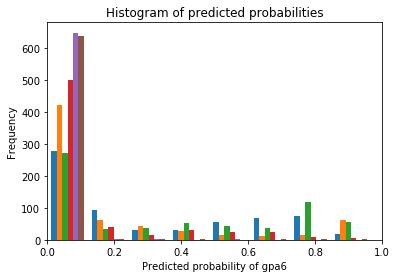

In [91]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of gpa6')
plt.ylabel('Frequency')

In [94]:
y_pred_prob.shape

(654, 6)

In [101]:
######   Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

from sklearn.preprocessing import binarize
preds = binarize([y_pred_prob], 0.1)[:,]

ValueError: Found array with dim 3. Estimator expected <= 2.

In [93]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([[8.0676572e-03, 1.6003962e-03, 5.7486200e-01, 4.1080892e-01,
        2.7365705e-03, 1.9244908e-03],
       [8.0531639e-01, 1.4932638e-01, 4.1271534e-02, 9.2077785e-04,
        7.3853129e-04, 2.4263510e-03],
       [3.6597028e-02, 9.1895044e-01, 6.4211655e-03, 7.8189780e-04,
        6.1580579e-04, 3.6633655e-02],
       [5.8653045e-01, 8.7604141e-03, 3.9780465e-01, 4.8522381e-03,
        9.5192250e-04, 1.1003368e-03],
       [1.1603163e-01, 8.6366004e-01, 9.5596528e-03, 3.0289730e-03,
        6.3744484e-04, 7.0822407e-03],
       [1.8810213e-03, 4.0963823e-03, 4.3663087e-01, 5.3993434e-01,
        1.4975640e-02, 2.4817456e-03],
       [9.8542951e-04, 1.2329316e-03, 2.8712246e-01, 7.0116705e-01,
        7.3613324e-03, 2.1308511e-03],
       [8.8062978e-01, 6.9303282e-02, 4.4728596e-02, 2.7566683e-03,
        9.2984695e-04, 1.6517894e-03],
       [2.8003124e-03, 1.4796553e-03, 3.6896503e-01, 5.5273074e-01,
        6.7449003e-02, 6.5752640e-03],
       [1.4856404e-01, 1.9149820e-03,

In [85]:
# print the first 10 predicted classes with the lower threshold
preds[0:10]

array([0., 1., 0., 1., 1., 0., 0., 1., 0., 1.], dtype=float32)

In [86]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[145   8  33   0   0   0]
 [ 41  91   0   0   0   3]
 [ 34   0 193  20   0   0]
 [  0   0  30  40   0   0]
 [  0   0   0   4   1   0]
 [  0   4   0   0   0   7]]


In [87]:
# new confusion matrix (threshold of 0.3)
#print(metrics.confusion_matrix(y_test, preds))

confusion = metrics.confusion_matrix(y_test,preds)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(metrics.confusion_matrix(y_test, preds))

[[  7 179   0   0   0   0]
 [ 56  79   0   0   0   0]
 [109 138   0   0   0   0]
 [ 66   4   0   0   0   0]
 [  5   0   0   0   0   0]
 [ 11   0   0   0   0   0]]


In [48]:
##### SENSETIVITY   now less !!!!

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, preds , average = 'macro'))

0.43703703703703706
0.09882516925527679


In [49]:
#### Specificity  now less

print(TN / float(TN + FP))

0.15591397849462366


In [7]:
from sklearn.preprocessing import LabelEncoder

In [11]:

encoder = LabelEncoder()
encoder.fit(['D','C','B','A','A*','H'])
encoder.classes_

array(['A', 'A*', 'B', 'C', 'D', 'H'], dtype='<U2')

In [12]:
encoder.transform(['D','C','B','A','A*','H'])

array([4, 3, 2, 0, 1, 5], dtype=int64)

In [13]:
encoder.inverse_transform([3,2,1])

array(['C', 'B', 'A*'], dtype='<U2')